### So here, we are using the same dataset we used in Example 1 but this time we trying to understand/improve with Ridge and Lasso Regression
#### Ridge and Lasso are surpervise learning regression
#### Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.
#### Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. (Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting & Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features)
#### Ridge Regression: Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients. Minimization objective = LS Obj + α * (sum of square of coefficients)
#### Lasso Regression: Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients. Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
####  ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.
#### ridge regression puts constraint on the coefficients. The penalty term regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. 
#### ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 
#### For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), some coefficients' magnitude are considerably less compared to linear regression.
#### Lasso - The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. Just like Ridge regression the regularization parameter (penalty term) can be controlled.
<br />
1. Key Difference
<br />
Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
<br />
Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.
<br />
Traditionally, techniques like stepwise regression were used to perform feature selection and make parsimonious models. But with advancements in Machine Learning, ridge and lasso regression provide very good alternatives as they give much better output, require fewer tuning parameters and can be automated to a large extend.
<br />
<br />
2. Typical Use Cases
<br />
Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
<br />
Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.
<br />
Its not hard to see why the stepwise selection techniques become practically very cumbersome to implement in high dimensionality cases. Thus, lasso provides a significant advantage.
<br />
<br />
3. Presence of Highly Correlated Features
<br />
Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.
<br />
Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.
<br />

### In this improvement test, we select alpha 1, 100, and 1000 for testing. 

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
# Defining a Function to Calculate the Adjusted R squared
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

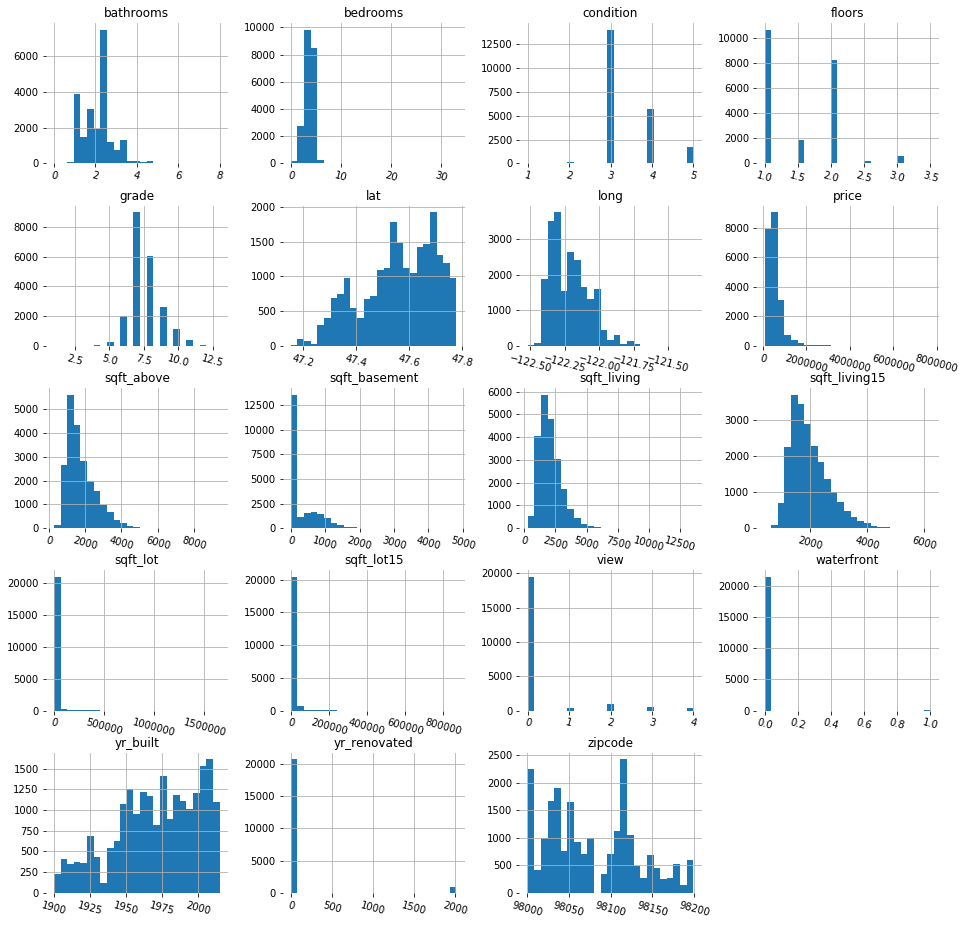

In [3]:
# Visualizing and Examining Data
new_data=data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = new_data.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

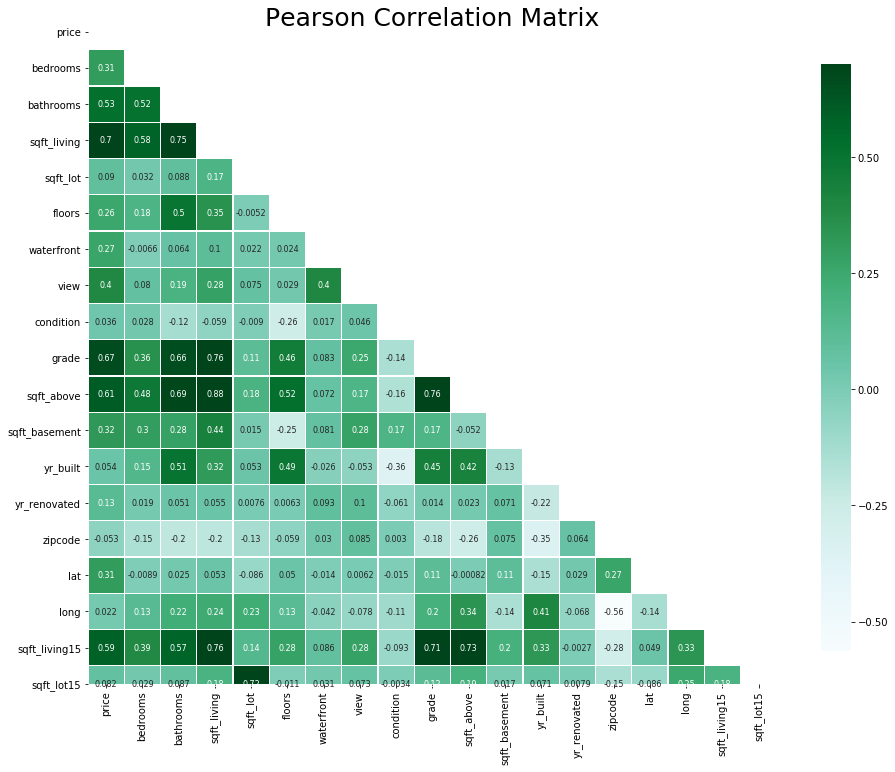

In [4]:
# Checking Out the Correlation Among Explanatory Variables
features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

mask = np.zeros_like(new_data[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(new_data[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.
<br />
<br />
Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. For instance, if there is overfitting, we may remove sqt_above or sqt_living because they are highly correlated. This relation can be estimated when we look at the definitions in the dataset but to be sure correlation matrix should be checked. However, this does not mean that you must remove one of the highly correlated features. For example: bathrooms and sqrt_living. They are highly correlated but I do not think that the relation among them is the same as the relation between sqt_living and sqt_above.

### Train Models

In [5]:
train_data,test_data = train_test_split(new_data,train_size = 0.8,random_state=0)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement',
            'zipcode','lat','long','sqft_living15','sqft_lot15']

# Multiple Linear Regression

model_M = linear_model.LinearRegression()
model_M.fit(train_data[features],train_data['price'])

pred = model_M.predict(test_data[features])
msem = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrm = float(format(model_M.score(train_data[features],train_data['price']),'.3f'))
artrm = float(format(adjustedR2(model_M.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem = float(format(model_M.score(test_data[features],test_data['price']),'.3f'))
artem = float(format(adjustedR2(model_M.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv = float(format(cross_val_score(model_M,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression','all features',msem,rtrm,artrm,rtem,artem,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Multiple Linear Regression,all features,198098.398,0.679,0.678,0.67,0.669,0.674


In [6]:
# Ridge Regression

model_R = linear_model.Ridge(alpha=1)
model_R.fit(train_data[features],train_data['price'])

pred1 = model_R.predict(test_data[features])
msem1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrm1 = float(format(model_R.score(train_data[features],train_data['price']),'.3f'))
artrm1 = float(format(adjustedR2(model_R.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem1 = float(format(model_R.score(test_data[features],test_data['price']),'.3f'))
artem1 = float(format(adjustedR2(model_R.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_R,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

model_R = linear_model.Ridge(alpha=100)
model_R.fit(train_data[features],train_data['price'])

pred2 = model_R.predict(test_data[features])
msem2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrm2 = float(format(model_R.score(train_data[features],train_data['price']),'.3f'))
artrm2 = float(format(adjustedR2(model_R.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem2 = float(format(model_R.score(test_data[features],test_data['price']),'.3f'))
artem2 = float(format(adjustedR2(model_R.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(model_R,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

model_R = linear_model.Ridge(alpha=1000)
model_R.fit(train_data[features],train_data['price'])

pred3 = model_R.predict(test_data[features])
msem3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrm3 = float(format(model_R.score(train_data[features],train_data['price']),'.3f'))
artrm3 = float(format(adjustedR2(model_R.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem3 = float(format(model_R.score(test_data[features],test_data['price']),'.3f'))
artem3 = float(format(adjustedR2(model_R.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(model_R,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1',msem1,rtrm1,artrm1,rtem1,artem1,cv1]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100',msem2,rtrm2,artrm2,rtem2,artem2,cv2]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000',msem3,rtrm3,artrm3,rtem3,artem3,cv3]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=True)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,Ridge Regression,alpha=1,198077.388,0.678,0.678,0.670,0.669,0.674
0,Multiple Linear Regression,all features,198098.398,0.679,0.678,0.670,0.669,0.674
2,Ridge Regression,alpha=100,199532.532,0.670,0.670,0.665,0.664,0.666
3,Ridge Regression,alpha=1000,212954.262,0.624,0.623,0.619,0.617,0.620


In [7]:
# Lasso Regression

model_L = linear_model.Lasso(alpha=1)
model_L.fit(train_data[features],train_data['price'])

pred1 = model_L.predict(test_data[features])
msem1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrm1 = float(format(model_L.score(train_data[features],train_data['price']),'.3f'))
artrm1 = float(format(adjustedR2(model_L.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem1 = float(format(model_L.score(test_data[features],test_data['price']),'.3f'))
artem1 = float(format(adjustedR2(model_L.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(model_L,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

model_L = linear_model.Lasso(alpha=100)
model_L.fit(train_data[features],train_data['price'])

pred2 = model_L.predict(test_data[features])
msem2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrm2 = float(format(model_L.score(train_data[features],train_data['price']),'.3f'))
artrm2 = float(format(adjustedR2(model_L.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem2 = float(format(model_L.score(test_data[features],test_data['price']),'.3f'))
artem2 = float(format(adjustedR2(model_L.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(model_L,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

model_L = linear_model.Lasso(alpha=1000)
model_L.fit(train_data[features],train_data['price'])

pred3 = model_L.predict(test_data[features])
msem3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrm3 = float(format(model_L.score(train_data[features],train_data['price']),'.3f'))
artrm3 = float(format(adjustedR2(model_L.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtem3 = float(format(model_L.score(test_data[features],test_data['price']),'.3f'))
artem3 = float(format(adjustedR2(model_L.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(model_L,new_data[features],new_data['price'],cv=5).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1',msem1,rtrm1,artrm1,rtem1,artem1,cv1]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100',msem2,rtrm2,artrm2,rtem2,artem2,cv2]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000',msem3,rtrm3,artrm3,rtem3,artem3,cv3]
evaluation.sort_values(by = 'Root Mean Squared Error (RMSE)', ascending=True)

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
5,Lasso Regression,alpha=100,198045.276,0.678,0.678,0.670,0.669,0.674
1,Ridge Regression,alpha=1,198077.388,0.678,0.678,0.670,0.669,0.674
4,Lasso Regression,alpha=1,198097.801,0.679,0.678,0.670,0.669,0.674
0,Multiple Linear Regression,all features,198098.398,0.679,0.678,0.670,0.669,0.674
6,Lasso Regression,alpha=1000,198110.626,0.676,0.676,0.670,0.669,0.672
2,Ridge Regression,alpha=100,199532.532,0.670,0.670,0.665,0.664,0.666
3,Ridge Regression,alpha=1000,212954.262,0.624,0.623,0.619,0.617,0.620


### Looks like Lasso Regression at alpha value 100 is better among others.
#### We can also do some data preprosessing to improve the result, such that binning data together (like yr_built and yr_renovated, such that adding date data to these two features to form new datasets of the age of the buildings and age of the renovation when the houses were sold) to reduce the effects of minor observation errors, instead of getting rid of date data.